The purpose of this notebook is to generate some figures that communicate the breakdown of tweets by zero-exposure, astroturfed, and other.

In [1]:
import os 
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_DIR = '/pool001/jschless/kiran-data/kiran-data/'
TURKEY_DIR = '/pool001/jschless/turkish_astroturfing'

## Load Turkey Data

In [2]:
# Loading df created in the Turkey_Data_Wrangling notebook
df = pd.read_pickle(os.path.join(DATA_DIR, 'mega_df_full_follower_final.pkl'))

In [3]:
df['zero_exposure_post_trend'] = df.apply(lambda x: 1 if (x.exposed==False and x.time_since_trending>0) else 0, axis=1)

In [4]:
df['astroturfed'] = df.lexicon.map(lambda x: 1 if x else 0)

In [5]:
df['exposed'] = df.exposed.map(lambda x: 1 if x else 0)

In [6]:
rolled_up = df.groupby('trend').sum()[['exposed', 'zero_exposure_post_trend', 'astroturfed']]
temp = rolled_up.div(rolled_up.sum(axis=1), axis=0).melt()
temp['type'] = "Turkey"

## Load India Data

In [7]:
import pickle
TWITTER_DATA_DIR = '/home/jschless/whatsapp/data/twitter-coordination-src/data'
with open(os.path.join(TWITTER_DATA_DIR, 'panel_df_dict.pkl'), 'rb') as f:
    df_dict = pickle.load(f)

In [8]:
top_50_panel_df = df_dict[('earliest', 50)]

In [9]:
rolled_up_india = (
    top_50_panel_df.groupby('hashtag').sum()
    [['template', 'nonzero_exposure_regular', 'zero_exposure_regular']]
    .rename(columns={'template': 'astroturfed', 'nonzero_exposure_regular': 'exposed',
                     'zero_exposure_regular': 'zero_exposure_post_trend'}
           )
)
temp_india = rolled_up_india.div(rolled_up_india.sum(axis=1), axis=0).melt()
temp_india['type'] = "India"

In [13]:
temp

,variable,value,type
0,exposed,0.622141,Turkey
1,exposed,0.877389,Turkey
2,exposed,0.883559,Turkey
3,exposed,0.818040,Turkey
4,exposed,0.738547,Turkey
...,...,...,...
1249,astroturfed,0.056882,Turkey
1250,astroturfed,0.273381,Turkey
1251,astroturfed,0.039510,Turkey
1252,astroturfed,0.107639,Turkey


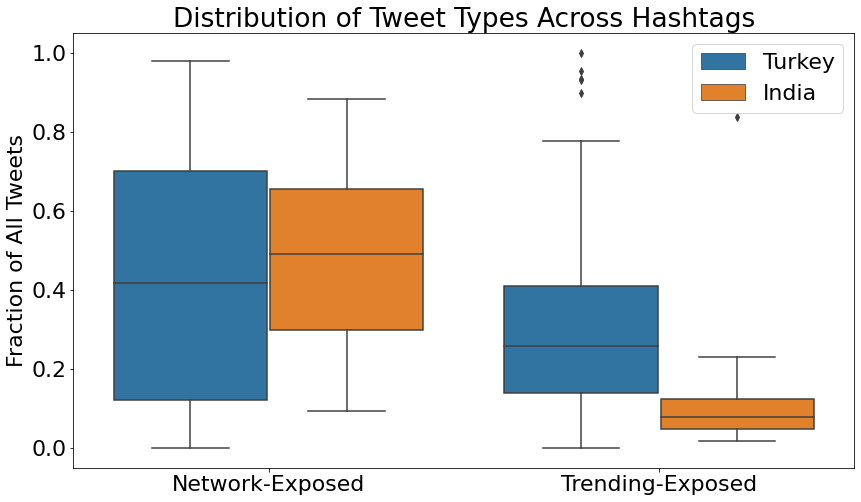

In [15]:
import matplotlib as mpl, seaborn as sns
mpl.rcParams.update({'font.size': 22})
plt.figure(figsize=(14,8))
sns.boxplot(x='variable', y='value', hue='type',
            data=pd.concat([temp, temp_india]).query('variable != "astroturfed"'))
plt.xticks([0,1], labels=['Network-Exposed', 'Trending-Exposed'])
plt.ylabel('Fraction of All Tweets')
# plt.xlabel('Tweet Category')
plt.xlabel('')
plt.legend(title='', loc='upper right')
plt.title('Distribution of Tweet Types Across Hashtags')
plt.savefig('/home/jschless/paper_figs/tweet_type_distributions.pdf')